In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(20,10)

In [2]:
dataset = pd.read_csv('Bengaluru_House_Data.csv')
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
dataset.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
dataset.shape

(13320, 9)

In [5]:
dataset.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df = dataset.drop(['area_type','availability','society','balcony'],axis=1)

In [7]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [9]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df = df.dropna()
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df.size

66230

In [12]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df['BHK'] = df['size'].apply(lambda x : int(x.split()[0]))
df.drop('size',axis=1,inplace=True)

In [14]:
df.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [15]:
df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
def is_float(x):
    try:
        float(x)
    except :
        return False
    return True

In [17]:
df[~df['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [18]:
def convert_range_to_num(x):
    n = x.split('-')
    if len(n)==2:
        return (float(n[0])+float(n[1]))/2
    try :
        return float(x)
    except:
        return None

In [19]:
df['total_sqft'] = df['total_sqft'].apply(convert_range_to_num)

In [20]:
df.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [21]:
df[~df['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,BHK


In [22]:
df['total_sqft'].isna().sum()

46

In [23]:
df.dropna(inplace=True)

In [24]:
df['total_sqft'].isna().sum()

0

In [25]:
df.head(10)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [26]:
df1 = df.copy()
df1['price_per_sqft'] = df['price']*100000/ df['total_sqft']
df1.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [27]:
len(df1.location.unique())

1298

In [28]:
df1.location = df1.location.apply(lambda x : x.strip())

location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [29]:
len(location_stats[location_stats<=10])

1047

In [30]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [31]:
df1.location = df1.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(df1.location.unique())

241

In [32]:
df1.head(10)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


## We'll decide a threshold of total sq. ft per bhk are then deletecolumns which have less than decided threshold value

In [33]:
df1[df1['total_sqft']/df1['BHK']<=300]

,location,total_sqft,bath,price,BHK,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13300,Hosakerehalli,1500.0,6.0,145.0,5,9666.666667
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649
13306,other,1200.0,5.0,325.0,4,27083.333333


### These entries are clearly Errors or outliers we can safely remove them

In [34]:
df1.drop(df1[df1['total_sqft']/df1['BHK']<=300].index,axis=0,inplace=True)

In [35]:
df1[df1['total_sqft']/df1['BHK']<=300]

,location,total_sqft,bath,price,BHK,price_per_sqft


In [36]:
df1.shape

(12274, 6)

In [37]:
df2 = df1.copy()

In [38]:
df2.price_per_sqft.describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

### Now we can see that min of these property per sq ft price is very less and some of them are very high we dont want them in dataset because they will disturb our general output

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df =subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.shape

(10018, 6)

In [40]:
df3.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [41]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.BHK==2)]
    bhk3 = df[(df.location == location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Totalsqft area')
    plt.ylabel('price per sqft area')
    plt.title(location)
    plt.legend()

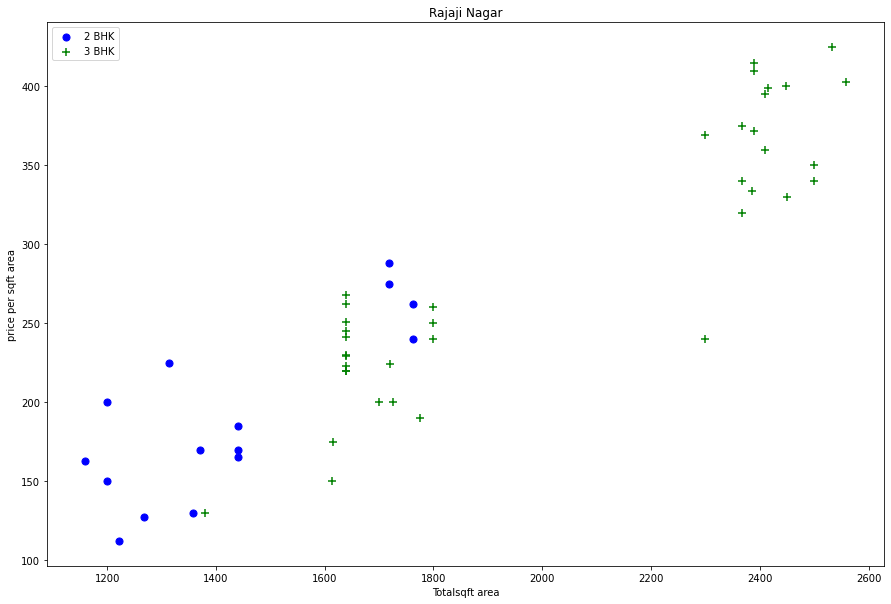

In [42]:
plot_scatter_chart(df3,'Rajaji Nagar')

### We can see here some of the 2bhk apartments have more price then 3 bhk which can be possible but in out our model they will create problem

In [43]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] ={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [44]:
df4 = remove_bhk_outlier(df3)
df4.shape

(7150, 6)

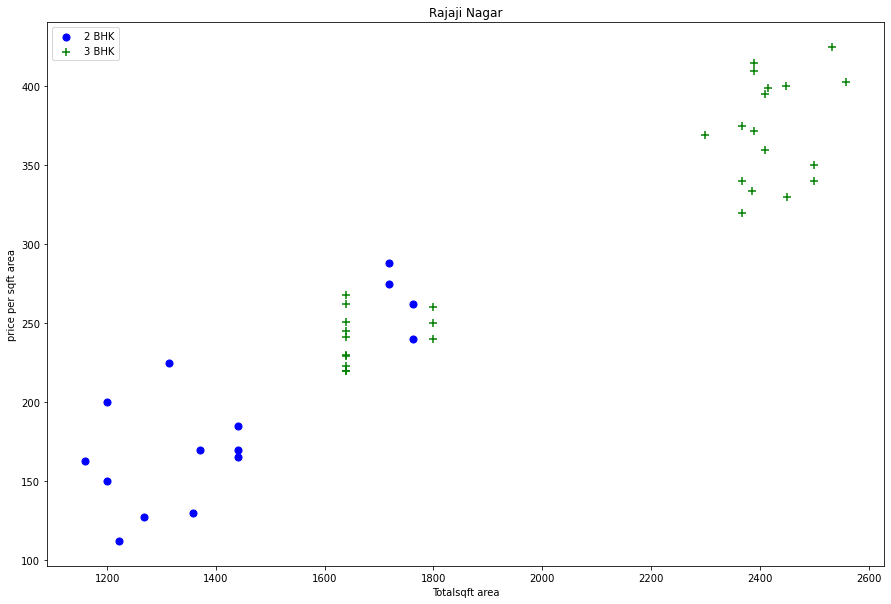

In [45]:
plot_scatter_chart(df4,'Rajaji Nagar')

Text(0, 0.5, 'Count')

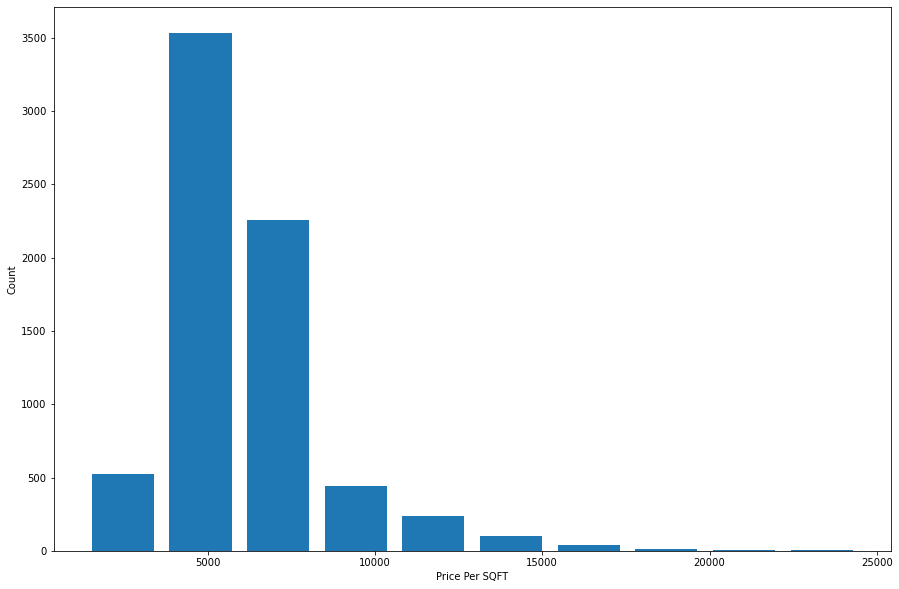

In [46]:
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per SQFT')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

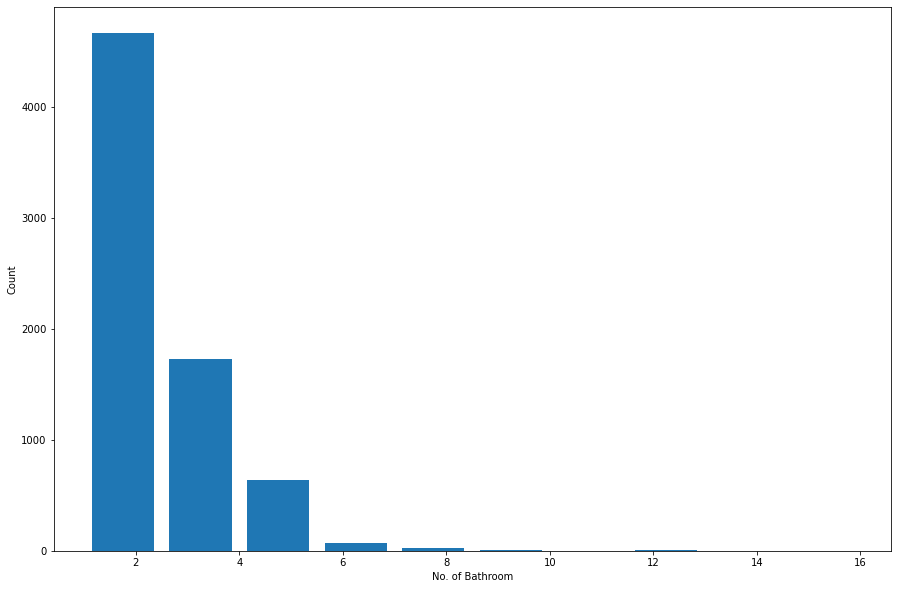

In [47]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel('No. of Bathroom')
plt.ylabel('Count')

###  bathroom > room + 2 is use less these kind of data are waste we'll try to remove this

In [48]:
df4[df4['bath']>df4['BHK']+2]

,location,total_sqft,bath,price,BHK,price_per_sqft
1565,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5099,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6562,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8229,other,11338.0,9.0,1000.0,6,8819.897689


In [49]:
df5 = df4[~(df4['bath']>df4['BHK']+2)]

In [50]:
df5.shape

(7146, 6)

In [51]:
main_dataset = df5.drop(['price_per_sqft'],axis=1)

In [52]:
main_dataset = pd.concat([main_dataset,pd.get_dummies(main_dataset.location).drop('other',axis=1)],axis=1)

In [53]:
main_dataset.drop('location',axis=1,inplace=True)

In [54]:
main_dataset.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
main_dataset.shape

(7146, 244)

In [56]:
X = main_dataset.drop('price',axis=1)
y = main_dataset['price']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [58]:
len(X_train)

5716

In [59]:
len(X_test)

1430

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8551162624517414

In [61]:
from sklearn.model_selection import cross_val_score,ShuffleSplit
cv = ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.81402077, 0.84724095, 0.86009085, 0.86105733, 0.87195219])

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor



In [63]:
def fin_best_model_using_gridsearch(X,y):
    algos = {
        'linear_regression' :{
            'model':LinearRegression(),
            'params' :{
                'normalize':[False]
            }
        },
        'lasso' :{
            'model':Lasso(),
            'params' :{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree' :{
            'model':DecisionTreeRegressor(),
            'params' :{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
            
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score',"best_params"])

In [64]:
df_mdl = fin_best_model_using_gridsearch(X,y)

In [65]:
df_mdl

,model,best_score,best_params
0,linear_regression,0.849260,{'normalize': False}
1,lasso,0.707790,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.698414,"{'criterion': 'mse', 'splitter': 'random'}"


#### from here we can say our linear regression model is best 
so now we will make function to predict 

In [66]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0],x[1],x[2] = sqft,bath,bhk
    if loc_index>=0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [67]:
predict_price('Electronic City',1000,2,2)

48.13150023748375

In [68]:
predict_price('Indira Nagar',1000,3,4)

192.51513722381657

In [69]:
import pickle
with open('banglore_house.pickle','wb') as f :
    pickle.dump(lr_clf,f)


In [71]:
import json
columns ={
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))